#Logistic Regression


In [ ]:
# ==============================================================================
# Step 1: Import Necessary Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # <-- Changed import
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files

# ==============================================================================
# Step 2: Upload Your Dataset to Google Colab
# ==============================================================================
print("Please upload your 'DailyDialog.csv' file.")
uploaded = files.upload()

try:
    filename = next(iter(uploaded))
    print(f"\nSuccessfully uploaded '{filename}'")
except StopIteration:
    print("No file was uploaded. Please run the cell again and select a file.")
    exit()


In [5]:
# ==============================================================================
# Step 3: Load and Preprocess the Data
# ==============================================================================
print("\nLoading and preprocessing data...")
df = pd.read_csv(filename)

# --- Data Cleaning and Mapping ---
df.dropna(subset=['text', 'sentiment'], inplace=True)

# --- THIS IS THE NEW STEP FOR MAPPING SENTIMENTS ---
# Create a dictionary to map detailed emotions to the three main categories
sentiment_map = {
    'joy': 'positive',
    'sadness': 'negative',
    'anger': 'negative',
    'fear': 'negative',
    # Any other negative emotions would go here
    'neutral': 'neutral'
    # Any other positive emotions would go here
}

# Apply the mapping to the 'sentiment' column to create a new target column
df['sentiment_mapped'] = df['sentiment'].map(sentiment_map)

# Drop any rows where the sentiment was not in our map (e.g., 'surprise')
df.dropna(subset=['sentiment_mapped'], inplace=True)
# -----------------------------------------------------------------

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['text'] = df['text'].apply(clean_text)

# --- Define Features (X) and Target (y) using the NEW mapped column ---
X = df['text']
y = df['sentiment_mapped'] # <-- Using the new 'positive'/'negative'/'neutral' column

print("Data loading, mapping, and preprocessing complete.")
print(f"Dataset has {df.shape[0]} rows after cleaning and mapping.")
print("\nSentiment distribution after mapping:")
print(y.value_counts())


# ==============================================================================
# Step 4: Split Data and Vectorize Text
# ==============================================================================
print("\nSplitting data and vectorizing text...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text vectorization complete.")


# ==============================================================================
# Step 5: Train the Logistic Regression Model
# ==============================================================================
print("\nTraining the Logistic Regression model...")
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000) # <-- Changed model

# Train the model
lr_model.fit(X_train_tfidf, y_train)

print("Model training complete.")


# ==============================================================================
# Step 6: Evaluate the Model
# ==============================================================================
print("\nEvaluating the model on the test set...")
y_pred = lr_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
# The report will now show 'positive', 'negative', and 'neutral'
print(classification_report(y_test, y_pred, zero_division=0))


# ==============================================================================
# Step 7: Test the Model with Your Own Sentence! 🚀
# ==============================================================================
print("\n" + "="*50)
print("Sentiment Analysis Prediction (Logistic Regression)")
print("="*50)

user_sentence = input("Enter a sentence to analyze its sentiment: ")

cleaned_sentence = clean_text(user_sentence)
vectorized_sentence = tfidf_vectorizer.transform([cleaned_sentence])

# Predict using the Logistic Regression model
prediction = lr_model.predict(vectorized_sentence)
probabilities = lr_model.predict_proba(vectorized_sentence)
sentiment_classes = lr_model.classes_

print(f"\nSentence: '{user_sentence}'")
print(f"Predicted Sentiment: -> {prediction[0].upper()} <-")

print("\nConfidence Scores:")
for i, sentiment in enumerate(sentiment_classes):
    print(f"  - {sentiment.capitalize()}: {probabilities[0][i]*100:.2f}%")
print("="*50)


Loading and preprocessing data...
Data loading, mapping, and preprocessing complete.
Dataset has 11327 rows after cleaning and mapping.

Sentiment distribution after mapping:
sentiment_mapped
negative    6747
positive    2326
neutral     2254
Name: count, dtype: int64

Splitting data and vectorizing text...
Text vectorization complete.

Training the Logistic Regression model...
Model training complete.

Evaluating the model on the test set...

Overall Accuracy: 0.8063

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1350
     neutral       0.74      0.69      0.71       451
    positive       0.81      0.55      0.66       465

    accuracy                           0.81      2266
   macro avg       0.79      0.72      0.75      2266
weighted avg       0.80      0.81      0.80      2266


Sentiment Analysis Prediction (Logistic Regression)
Enter a sentence to analyze its sentiment: Even though the project w

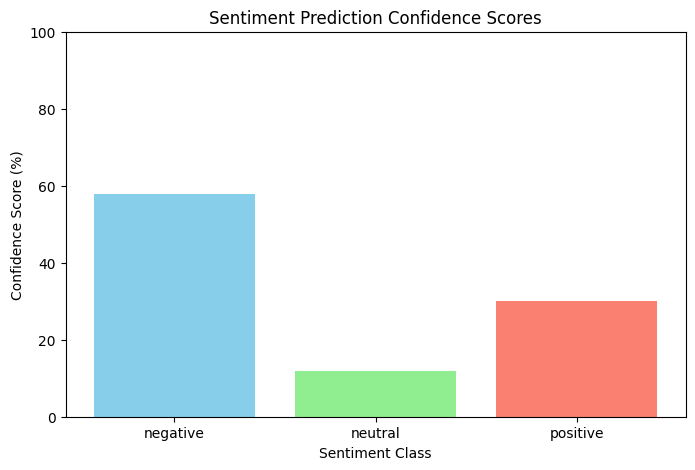

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the variables are available
if 'sentiment_classes' in locals() and 'probabilities' in locals():
    # Create a bar chart of the confidence scores
    sentiments = sentiment_classes
    scores = probabilities[0] * 100

    plt.figure(figsize=(8, 5))
    plt.bar(sentiments, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid'])
    plt.xlabel("Sentiment Class")
    plt.ylabel("Confidence Score (%)")
    plt.title("Sentiment Prediction Confidence Scores")
    plt.ylim(0, 100) # Set the y-axis limit to 0-100
    plt.show()
else:
    print("Please run the previous cell to get the sentiment classes and probabilities.")